# FIT5202 2024 S2 Assignment 1 : Analysing Fraudulent Transaction Data

## Table of Contents
* [Part 1 : Working with RDD](#part-1)  
    - [1.1 Data Preparation and Loading](#1.1)  
    - [1.2 Data Partitioning in RDD](#1.2)  
    - [1.3 Query/Analysis](#1.3)  
* [Part 2 : Working with DataFrames](#2-dataframes)  
    - [2.1 Data Preparation and Loading](#2-dataframes)  
    - [2.2 Query/Analysis](#2.2)  
* [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)  

# Part 1 : Working with RDDs (30%) <a class="anchor" name="part-1"></a>
## 1.1 Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries. 

1.1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession. To create a SparkSession you first need to build a SparkConf object that contains information about your application, use Melbourne time as the session timezone. Give an appropriate name for your application and run Spark locally with 4 cores on your machine. 

In [1]:
# sc.stop()

In [2]:
from pyspark import SparkConf
master = "local[4]"  # 4 cores
app_name = "FIT5202 A1"
spark_conf = SparkConf().setMaster(master).setAppName(app_name)
spark_conf.set("spark.sql.session.timeZone", "Australia/Melbourne") # timezone

from pyspark import SparkContext 
from pyspark.sql import SparkSession 

spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
# spark.sql("SET TIME ZONE 'Australia/Melbourne'")
sc = spark.sparkContext
sc.setLogLevel('ERROR')

1.1.2 Load csv files into multiple RDDs.

In [3]:
category_rdd  = sc.textFile('category.csv')
customers_rdd = sc.textFile('customers.csv')
geolocation_rdd = sc.textFile('geolocation.csv')
merchant_rdd = sc.textFile('merchant.csv')
transactions_rdd = sc.textFile('transactions.csv')

1.1.3 For each RDD, remove the header rows and display the total count and first 10 records. (Hint: You can use csv.reader to parse rows into RDDs.)

In [4]:
from pyspark.rdd import RDD
import csv

def remove_header(rdd):
    rdd = rdd.map(lambda line: next(csv.reader([line]))) 
    header = rdd.first()
    rdd = rdd.filter(lambda row: row != header)
    return rdd
    
category_rdd = remove_header(category_rdd)
customers_rdd = remove_header(customers_rdd)
geolocation_rdd = remove_header(geolocation_rdd)
merchant_rdd = remove_header(merchant_rdd)
transactions_rdd = remove_header(transactions_rdd)

In [5]:
display(category_rdd.count())
category_rdd.take(10)

14

[['Entertainment', '1'],
 ['Food_Dining', '2'],
 ['Gas_Transport', '3'],
 ['Grocery(Online)', '4'],
 ['Grocery(In Store)', '5'],
 ['Health_Fitness', '6'],
 ['Home', '7'],
 ['Pets', '8'],
 ['Misc(Online)\\', '9'],
 ['Misc(In Store)', '10']]

In [6]:
display(customers_rdd.count())
customers_rdd.take(10)

10000

[['263-99-6044',
  '4241904966319315',
  'Melissa',
  'Turner',
  'F',
  '058 Stanley Cliff',
  'Risk manager',
  '2005-05-30',
  '376443331852',
  '6339'],
 ['292-61-7844',
  '30520471167198',
  'Mark',
  'Brown',
  'M',
  '413 Angela Mall',
  'Trading standards officer',
  '2003-04-19',
  '870143739098',
  '6200'],
 ['491-28-3311',
  '180084219933088',
  'Courtney',
  'Hall',
  'F',
  '5712 Tamara Estate',
  'Optometrist',
  '2002-04-17',
  '965855026307',
  '3547'],
 ['826-23-1754',
  '2623398454615676',
  'Krystal',
  'Branch',
  'F',
  '1016 Bennett Mountains',
  'Banker',
  '2001-07-15',
  '11324746755',
  '6302'],
 ['172-11-9264',
  '639034043849',
  'Carol',
  'Ellis',
  'F',
  '819 Joseph Plains Suite 807',
  'Sports coach',
  '2003-11-21',
  '113495175185',
  '5227'],
 ['150-95-7922',
  '343731453038560',
  'Julie',
  'Gibson',
  'F',
  '51844 Nicholas Lane',
  'Medical secretary',
  '2006-03-06',
  '719783599768',
  '4047'],
 ['841-99-2980',
  '3525799136621031',
  'Joseph',

In [7]:
display(geolocation_rdd.count())
geolocation_rdd.take(10)

6342

[['Burkeville', 'TX', '75932', '31.0099', '-93.6585', '1', '1437'],
 ['Fresno', 'TX', '77545', '29.5293', '-95.4626', '2', '19431'],
 ['Osseo', 'MN', '55311', '45.1243', '-93.4996', '3', '65312'],
 ['Pomona', 'CA', '91766', '34.0418', '-117.7569', '4', '154204'],
 ['Vacaville', 'CA', '95688', '38.3847', '-121.9887', '5', '99475'],
 ['South Lake Tahoe', 'CA', '96150', '38.917', '-119.9865', '6', '29800'],
 ['Belvidere', 'TN', '37306', '35.1415', '-86.1728', '7', '2760'],
 ['Columbia', 'SC', '29205', '33.9903', '-80.9997', '8', '333497'],
 ['Chicago', 'IL', '60660', '41.9909', '-87.6629', '9', '2680484'],
 ['Tunnelton', 'WV', '26444', '39.3625', '-79.7478', '10', '3639']]

In [8]:
display(merchant_rdd.count())
merchant_rdd.take(10)

3837031

[['Bins-Tillman', '6051', '1'],
 ['Hahn, Douglas and Schowalter', '1276', '2'],
 ['Hayes, Marquardt and Dibbert', '1383', '3'],
 ['Mueller, Gerhold and Mueller', '1846', '4'],
 ['Kerluke Inc', '1784', '5'],
 ['Waelchi Inc', '4637', '6'],
 ['Trantow PLC', '2176', '7'],
 ['Runolfsson and Sons', '3968', '8'],
 ['Bechtelar-Rippin', '1048', '9'],
 ['Schumm, Bauch and Ondricka', '1553', '10']]

In [9]:
display(transactions_rdd.count())
transactions_rdd.take(10)

22949835

[['0c20530e90719213c442744161a1850b',
  '1622367050',
  '87.18',
  '0',
  '794-45-4364',
  '46',
  '2641132',
  '12'],
 ['984fc48fc946605deefc9d0967582811',
  '1609183538',
  '276.97',
  '0',
  '436-80-2340',
  '60',
  '2932280',
  '5'],
 ['b13ff47c73689bc4c8320c0ce403b15d',
  '1655595319',
  '7.67',
  '0',
  '385-77-6544',
  '87',
  '2708770',
  '2'],
 ['7cffae35cab67d9415f9f22d91ca7acc',
  '1613234460',
  '198.96',
  '0',
  '450-56-1117',
  '138',
  '1170872',
  '10'],
 ['22e01cb3403a4c7ce598ebe785e1e947',
  '1605030979',
  '33.46',
  '0',
  '397-54-0253',
  '218',
  '2470519',
  '5'],
 ['1d174d018228efcd1d5800f768628904',
  '1608989049',
  '2.74',
  '0',
  '248-09-7729',
  '222',
  '3436926',
  '9'],
 ['532536d65907e08d938cb31e3631ddd4',
  '1650997797',
  '1.23',
  '0',
  '277-12-7638',
  '337',
  '3750746',
  '2'],
 ['32d76f65b7512afbdc99331ee96bc6d7',
  '1649986601',
  '7.78',
  '0',
  '615-63-3623',
  '718',
  '3773961',
  '2'],
 ['c3f29bca602c9e2e9a188567f06d632f',
  '1617032215

1.1.4 Drop personal information columns from RDDs: cc_num, firstname, lastname, address. 

In [10]:
customers_rdd_new = customers_rdd.map(lambda row: row[0:1] + row[4:5] + row[6:]) # removed by only selecting relevant cols
customers_rdd_new.take(10)

[['263-99-6044', 'F', 'Risk manager', '2005-05-30', '376443331852', '6339'],
 ['292-61-7844',
  'M',
  'Trading standards officer',
  '2003-04-19',
  '870143739098',
  '6200'],
 ['491-28-3311', 'F', 'Optometrist', '2002-04-17', '965855026307', '3547'],
 ['826-23-1754', 'F', 'Banker', '2001-07-15', '11324746755', '6302'],
 ['172-11-9264', 'F', 'Sports coach', '2003-11-21', '113495175185', '5227'],
 ['150-95-7922',
  'F',
  'Medical secretary',
  '2006-03-06',
  '719783599768',
  '4047'],
 ['841-99-2980', 'M', 'Toxicologist', '2005-07-01', '908554315130', '6271'],
 ['705-41-6699', 'F', 'Product manager', '2003-01-23', '772162574642', '6302'],
 ['016-22-4524',
  'F',
  'Loss adjuster, chartered',
  '2001-08-26',
  '982712248618',
  '5614'],
 ['639-46-2126', 'F', 'Hydrologist', '2005-02-10', '603471636817', '6328']]

### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
1.2.1 For each RDD, print out the total number of partitions and the number of records in each partition.

In [11]:
def print_partitions(data):
    if isinstance(data, RDD):
        numPartitions = data.getNumPartitions()
        partitions = data.glom().collect()
    else:
        numPartitions = data.rdd.getNumPartitions()
        partitions = data.rdd.glom().collect()
    
    print(f"####### NUMBER OF PARTITIONS: {numPartitions}")
    for index, partition in enumerate(partitions):
        if len(partition) > 0:
            print(f"Partition {index}: {len(partition)} records")

In [12]:
print_partitions(category_rdd)

####### NUMBER OF PARTITIONS: 2
Partition 0: 6 records
Partition 1: 8 records


In [13]:
print_partitions(customers_rdd_new)

####### NUMBER OF PARTITIONS: 2
Partition 0: 5002 records
Partition 1: 4998 records


In [14]:
print_partitions(geolocation_rdd)

####### NUMBER OF PARTITIONS: 2
Partition 0: 3178 records
Partition 1: 3164 records


In [15]:
print_partitions(merchant_rdd)

####### NUMBER OF PARTITIONS: 4
Partition 0: 1094930 records
Partition 1: 1059961 records
Partition 2: 1059729 records
Partition 3: 622411 records


In [16]:
trans_partition = transactions_rdd.getNumPartitions()
print(f"####### NUMBER OF PARTITIONS: {trans_partition}")

def count_records(index, partition):
    count = len(list(partition))  
    return [(index, count)]  

trans_records = transactions_rdd.mapPartitionsWithIndex(count_records).collect()
for index, records in trans_records:
        if records > 0:
            print(f"Partition {index}: {records} records")

####### NUMBER OF PARTITIONS: 56
Partition 0: 409654 records
Partition 1: 409552 records
Partition 2: 409551 records
Partition 3: 409568 records
Partition 4: 409556 records
Partition 5: 409615 records
Partition 6: 409623 records
Partition 7: 409562 records
Partition 8: 409556 records
Partition 9: 409568 records
Partition 10: 409558 records
Partition 11: 409590 records
Partition 12: 409620 records
Partition 13: 409626 records
Partition 14: 409575 records
Partition 15: 409576 records
Partition 16: 409570 records
Partition 17: 409576 records
Partition 18: 409544 records
Partition 19: 409653 records
Partition 20: 409581 records
Partition 21: 409577 records
Partition 22: 409557 records
Partition 23: 409565 records
Partition 24: 409576 records
Partition 25: 409604 records
Partition 26: 409617 records
Partition 27: 409570 records
Partition 28: 409541 records
Partition 29: 409582 records
Partition 30: 409562 records
Partition 31: 409584 records
Partition 32: 409654 records
Partition 33: 409598

1.2.2 Answer the following questions:   
a) How many partitions do the above RDDs have?   
b) How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain why it is partitioned in this number?   
c) Assuming we are querying the dataset based on transaction date, can you think of a better strategy to partition the data based on your available hardware resources?

Your answer for a: \
For category, customer and geolocation RDD's, there are 2 partitions. For merchant there are 4 partitions, whereas transaction RDD has 56 partitions. 

Your answer for b \
The default partioning method done above was hash partitioning. 

Your answer for c \
I would use range partitioning on the transaction dates by both year and month. For example for each transaction, partioned as: 
- Partition 0: January 2020
- Partition 1: February 2020
- Partition 13: January 2021 etc.
This would help improve query performance as it minimises the amount of data accessed. For example, if I want to analyse requests from transactions in January of 2020, I only need to access that partition. This also provides scalability since each data is distributed evenly as possible aross partitions which helps parallel processing.

1.2.3 Create a user defined function (UDF) to transform trans_timestamp to ISO format(YYYY-MM-DD hh:mm:ss), then call the UDF and add a new column trans_datetime.

In [17]:
from datetime import datetime
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def convert_time(trans_timestamp):
    trans_timestamp = int(trans_timestamp)
    trans_datetime = datetime.fromtimestamp(trans_timestamp).strftime('%Y-%m-%d %H:%M:%S')
    return trans_datetime

iso_udf = udf(convert_time,StringType()) # the inputs of trans_datetime will be string
transactions_df = transactions_rdd.toDF(["trans_id", "trans_timestamp", "amount", "status", "account_number", "age", "customer_id", "product_id"])
transactions_df = transactions_df.withColumn("trans_datetime", iso_udf("trans_timestamp"))
transactions_df.show()
transactions_rdd2 = transactions_df.rdd

+--------------------+---------------+------+------+--------------+----+-----------+----------+-------------------+
|            trans_id|trans_timestamp|amount|status|account_number| age|customer_id|product_id|     trans_datetime|
+--------------------+---------------+------+------+--------------+----+-----------+----------+-------------------+
|0c20530e90719213c...|     1622367050| 87.18|     0|   794-45-4364|  46|    2641132|        12|2021-05-30 09:30:50|
|984fc48fc946605de...|     1609183538|276.97|     0|   436-80-2340|  60|    2932280|         5|2020-12-28 19:25:38|
|b13ff47c73689bc4c...|     1655595319|  7.67|     0|   385-77-6544|  87|    2708770|         2|2022-06-18 23:35:19|
|7cffae35cab67d941...|     1613234460|198.96|     0|   450-56-1117| 138|    1170872|        10|2021-02-13 16:41:00|
|22e01cb3403a4c7ce...|     1605030979| 33.46|     0|   397-54-0253| 218|    2470519|         5|2020-11-10 17:56:19|
|1d174d018228efcd1...|     1608989049|  2.74|     0|   248-09-7729| 222|

After applying udf, converted dataframe back to RDD format.

In [18]:
from pyspark.sql import Row
#header = transactions_rdd2.first()
#transactions_rdd2 = transactions_rdd2.filter(lambda row: row != header)
transactions_rdd2 = transactions_rdd2.map(lambda row: list(row))
transactions_rdd2.take(10)

[['0c20530e90719213c442744161a1850b',
  '1622367050',
  '87.18',
  '0',
  '794-45-4364',
  '46',
  '2641132',
  '12',
  '2021-05-30 09:30:50'],
 ['984fc48fc946605deefc9d0967582811',
  '1609183538',
  '276.97',
  '0',
  '436-80-2340',
  '60',
  '2932280',
  '5',
  '2020-12-28 19:25:38'],
 ['b13ff47c73689bc4c8320c0ce403b15d',
  '1655595319',
  '7.67',
  '0',
  '385-77-6544',
  '87',
  '2708770',
  '2',
  '2022-06-18 23:35:19'],
 ['7cffae35cab67d9415f9f22d91ca7acc',
  '1613234460',
  '198.96',
  '0',
  '450-56-1117',
  '138',
  '1170872',
  '10',
  '2021-02-13 16:41:00'],
 ['22e01cb3403a4c7ce598ebe785e1e947',
  '1605030979',
  '33.46',
  '0',
  '397-54-0253',
  '218',
  '2470519',
  '5',
  '2020-11-10 17:56:19'],
 ['1d174d018228efcd1d5800f768628904',
  '1608989049',
  '2.74',
  '0',
  '248-09-7729',
  '222',
  '3436926',
  '9',
  '2020-12-26 13:24:09'],
 ['532536d65907e08d938cb31e3631ddd4',
  '1650997797',
  '1.23',
  '0',
  '277-12-7638',
  '337',
  '3750746',
  '2',
  '2022-04-26 18:29:

### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

1.3.1 Calculate the summary of fraudulent transactions amount for each year, each month. Print the results in tabular format.

In [19]:
year_month_rdd = transactions_rdd2.filter(lambda x: int(x[3]) == 1) \
                                  .map(lambda row: ((row[8][:4], row[8][5:7]), float(row[2])))  # extract year month and amt with slice

# group same year-month pair and aggregate their values
fraud_summary_rdd = year_month_rdd.reduceByKey(lambda a, b: a + b) \
                                  .map(lambda x: (x[0][0], x[0][1], x[1]))  # flatten to make it readable

fraud_summary_df = spark.createDataFrame(fraud_summary_rdd, schema=["Year", "Month", "Total Fraudulent Transactions"])
fraud_summary_df.orderBy("Year", "Month").show(36)

+----+-----+-----------------------------+
|Year|Month|Total Fraudulent Transactions|
+----+-----+-----------------------------+
|2020|   01|            898993.8700000001|
|2020|   02|           1055068.6900000004|
|2020|   03|                    864818.53|
|2020|   04|            797646.9800000001|
|2020|   05|            925864.7000000001|
|2020|   06|            983224.8500000001|
|2020|   07|            904102.0300000001|
|2020|   08|           1031171.3300000001|
|2020|   09|            895572.7000000003|
|2020|   10|                    917590.31|
|2020|   11|            876092.5300000004|
|2020|   12|                   1047136.05|
|2021|   01|            925229.7300000001|
|2021|   02|            789827.0700000002|
|2021|   03|                    892832.58|
|2021|   04|            907938.0599999999|
|2021|   05|                    967478.79|
|2021|   06|                    883641.08|
|2021|   07|            997994.1299999999|
|2021|   08|            935016.0900000001|
|2021|   09

1.3.2 List 20 mechants that suffered the most from fraudulent activities(i.e. 20 highest amount of monetary loss).

Top 20 Companies with Fraudulent Activities

In [20]:
# group merchant_id with fraudulent amt
merchant_id_fraud = transactions_rdd2.filter(lambda x: int(x[3]) == 1) \
                    .map(lambda row: (row[6], float(row[2]))) \
                    .reduceByKey(lambda a, b: a + b) 
# merchant_id_fraud.take(1)
merchant_rdd_join = merchant_rdd.map(lambda row: (row[2], row[0]))   
top_merchant_comp = merchant_id_fraud.join(merchant_rdd_join).map(lambda x: (x[1][1], x[1][0])) \
                    .sortBy(lambda x: x[1], ascending=False)
top_merchant_comp.take(20)

[("Greenholt, O'Hara and Balistreri", 4140.42),
 ('Kozey-Boehm', 3350.73),
 ('Labadie, Treutel and Bode', 3152.6099999999997),
 ('Kuhic LLC', 3116.01),
 ('Terry-Huel', 3058.5200000000004),
 ('Kerluke, Considine and Macejkovic', 3022.88),
 ('Nader-Heller', 2990.54),
 ('Labadie, Treutel and Bode', 2980.8599999999997),
 ('Kuhn LLC', 2903.51),
 ('Heathcote LLC', 2779.67),
 ('Weimann, Kuhic and Beahan', 2729.68),
 ('Bashirian Group', 2706.85),
 ('Little, Gutmann and Lynch', 2685.65),
 ('Hills-Witting', 2512.2200000000003),
 ('Mayert Group', 2456.3199999999997),
 ('Schmeler, Bashirian and Price', 2329.59),
 ('Zboncak, Rowe and Murazik', 2308.45),
 ('Towne, Greenholt and Koepp', 2278.31),
 ('DuBuque LLC', 2277.79),
 ('Lemke-Gutmann', 2274.36)]

## Part 2. Working with DataFrames (45%) <a class="anchor" name="2-dataframes"></a>
In this section, you need to load the given datasets into PySpark DataFrames and use DataFrame functions to answer the queries.
### 2.1 Data Preparation and Loading

2.1.1. Load the CSV files into separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each column.

In [21]:
df_category = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('category.csv')

df_customers = spark.read.format('csv')\
            .option('header',True).option('esacpe','"')\
            .load('customers.csv')

df_geolocation = spark.read.format('csv')\
            .option('header',True).option('esacpe','"')\
            .load('geolocation.csv')

df_merchant = spark.read.format('csv')\
            .option('header',True).option('esacpe','"')\
            .load('merchant.csv')

df_transactions = spark.read.format('csv')\
            .option('header',True).option('esacpe','"')\
            .load('transactions.csv')
# for sql
df_category.createOrReplaceTempView("sql_category")
df_customers.createOrReplaceTempView("sql_customers")
df_geolocation.createOrReplaceTempView("sql_geolocation")
df_merchant.createOrReplaceTempView("sql_merchant")
df_transactions.createOrReplaceTempView("sql_transactions")


2.1.2 Display the schema of the dataframes.

In [22]:
df_category.printSchema()
df_customers.printSchema()
df_geolocation.printSchema()
df_merchant.printSchema()
df_transactions.printSchema()

root
 |-- category: string (nullable = true)
 |-- id_category: string (nullable = true)

root
 |-- id_customer: string (nullable = true)
 |-- cc_num: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- address: string (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- acct_num: string (nullable = true)
 |-- id_geolocation: string (nullable = true)

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- id_geolocation: string (nullable = true)
 |-- population: string (nullable = true)

root
 |-- merchant: string (nullable = true)
 |-- id_geolocation: string (nullable = true)
 |-- id_merchant: string (nullable = true)

root
 |-- id_transaction: string (nullable = true)
 |-- trans_timestamp: string (nullable = true)
 |--

Think about: When the dataset is large, do you need all columns? How to optimize memory usage? Do you need a customized data partitioning strategy? (note: You don’t need to answer these questions.)

### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
Implement the following queries using dataframes. You need to be able to perform operations like filtering, sorting, joining and group by using the functions provided by the DataFrame API.   

2.2.1. Transform the “trans_timestamp” to multiple columns: trans_year, trans_month, trans_day, trans_hour(24-hour format). (note: you can reuse your UDF from part 1 or create a new one.)

In [23]:
from pyspark.sql.functions import year, month, dayofmonth, hour
from pyspark.sql.functions import col
def convert_time(trans_timestamp): # used from RDD
    trans_timestamp = int(trans_timestamp)
    trans_datetime = datetime.fromtimestamp(trans_timestamp).strftime('%Y-%m-%d %H:%M:%S')
    return trans_datetime

iso_udf = udf(convert_time,StringType()) # convert to trans_datetime and then extracted each of the following: 
df_transactions = df_transactions.withColumn('trans_datetime', iso_udf('trans_timestamp'))
df_transactions = df_transactions.withColumn('trans_year', year(col('trans_datetime'))) \
                                 .withColumn('trans_month', month(col('trans_datetime'))) \
                                 .withColumn('trans_day', dayofmonth(col('trans_datetime'))) \
                                 .withColumn('trans_hour', hour(col('trans_datetime')))
df_transactions.select('trans_timestamp', 'trans_datetime','trans_year', 'trans_month', 'trans_day', 'trans_hour').show()

+---------------+-------------------+----------+-----------+---------+----------+
|trans_timestamp|     trans_datetime|trans_year|trans_month|trans_day|trans_hour|
+---------------+-------------------+----------+-----------+---------+----------+
|     1622367050|2021-05-30 09:30:50|      2021|          5|       30|         9|
|     1609183538|2020-12-28 19:25:38|      2020|         12|       28|        19|
|     1655595319|2022-06-18 23:35:19|      2022|          6|       18|        23|
|     1613234460|2021-02-13 16:41:00|      2021|          2|       13|        16|
|     1605030979|2020-11-10 17:56:19|      2020|         11|       10|        17|
|     1608989049|2020-12-26 13:24:09|      2020|         12|       26|        13|
|     1650997797|2022-04-26 18:29:57|      2022|          4|       26|        18|
|     1649986601|2022-04-15 01:36:41|      2022|          4|       15|         1|
|     1617032215|2021-03-29 15:36:55|      2021|          3|       29|        15|
|     1609250028

2.2.2. Calculate the total amount of fraudulent transactions for each hour. Show the result in a table and plot a bar chart.

In [24]:
import pyspark.sql.functions as F
from pyspark.sql.functions import round # round transaction 2 dec places
df_transactions_fraud = df_transactions.filter(col('is_fraud') == 1)
agg_attribute = 'trans_hour'
df_total = df_transactions_fraud.groupBy(agg_attribute) \
                .agg(F.round(F.sum('amt'), 2).alias('total_fraud_transactions')) \
                .orderBy('trans_hour')
df_total.show(24)

+----------+------------------------+
|trans_hour|total_fraud_transactions|
+----------+------------------------+
|         0|               155478.63|
|         1|               285385.16|
|         2|               421123.21|
|         3|               397923.61|
|         4|               382781.02|
|         5|               450482.31|
|         6|               413311.33|
|         7|               429365.84|
|         8|               446479.61|
|         9|               419839.52|
|        10|               409774.71|
|        11|              5311654.56|
|        12|           1.021415001E7|
|        13|              5993048.91|
|        14|               1837859.1|
|        15|              1911326.17|
|        16|              1886629.17|
|        17|               1078952.7|
|        18|               144630.06|
|        19|               151641.65|
|        20|               142994.57|
|        21|               148930.09|
|        22|               137877.72|
|        23|

In [25]:
df_total= df_total.toPandas()

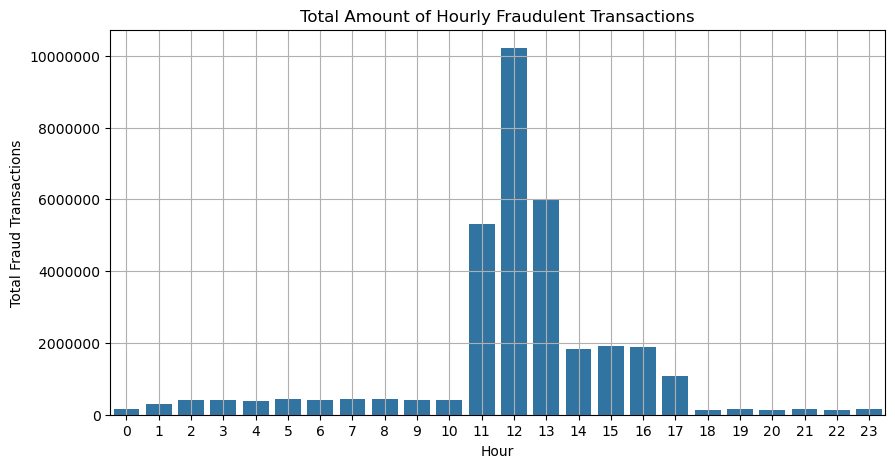

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x='trans_hour', y='total_fraud_transactions', data=df_total)
plt.xlabel('Hour')
plt.ylabel('Total Fraud Transactions')
plt.title('Total Amount of Hourly Fraudulent Transactions')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

2.2.3 Print number of small transactions(<=$100) from female who was born after 1990. 

In [27]:
df_transactions_female = (df_transactions.join(df_customers, on='id_customer', how='inner')
                          .withColumn('dob_year', F.year(F.to_date(F.col('dob'), 'yyyy-MM-dd')))
                          .filter((F.col('amt') <= 100) &  
                                  (F.col('gender') == 'F') &  
                                  (F.col('dob_year') > 1990))
                         )
df_transactions_female.select('id_customer','id_transaction', 'amt', 'gender', 'dob').show(truncate=False)

+-----------+--------------------------------+-----+------+----------+
|id_customer|id_transaction                  |amt  |gender|dob       |
+-----------+--------------------------------+-----+------+----------+
|432-36-7641|87ffe1a28514f81d8a399ebb523fc172|42.76|F     |1997-03-13|
|885-90-9940|40bc65185e4223accf1b587996a47a7e|31.13|F     |1996-05-03|
|880-84-9515|eb31de96994dfc47316563228746c610|31.45|F     |1995-09-06|
|059-25-1047|4ee776b0530d9899464c70b35cea3e67|2.4  |F     |1997-05-25|
|432-36-7641|393a4a312eb7b72e6612d256dd87772e|34.87|F     |1997-03-13|
|779-54-6256|93d7eafcdc6afa598af9fc272559f4bd|67.25|F     |1995-07-11|
|358-05-7479|bafead5ae158168e26f3de6f679f2edf|11.2 |F     |1998-12-09|
|254-38-4406|0eb2677f06b4fdae54c61a083416774f|84.25|F     |1992-08-23|
|760-26-8955|fd399537db08312086f168ecdbd40f6e|53.36|F     |1999-04-22|
|773-96-5045|bdc1a6f9c27c013d29c5cfa799a9eb85|4.0  |F     |1991-10-28|
|565-74-0730|35be5debcafd7b2ab3b5c7846c280e0e|45.46|F     |1993-03-12|
|199-7

2.2.4 We consider a fraud-to-sales(F2S) ratio of 3% as a benchmark. If a merchant has F2S >= 3%, it is considered operating at very high rick. How many companies are operating at very high risk? (note: The answer should be a single number.)

In [28]:
transaction_merchant = df_transactions.join(df_merchant, on='id_merchant', how='inner')
agg_attribute = 'merchant'
merchant_trans = transaction_merchant.groupBy(agg_attribute)\
                    .agg(F.sum('amt').alias('total_transactions'),
                         F.sum(F.when(F.col('is_fraud') == 1,
                                      F.col('amt')).otherwise(0)).alias('fraud_transactions')
    )
high_risk_companies = merchant_trans.withColumn('F2S_ratio', F.col('fraud_transactions') / F.col('total_transactions')) \
                                    .filter(F.col('F2S_ratio') >= 0.03)
high_risk_companies.count()

250

2.2.5 “Abbott and Adam Group” wants to know their total revenue(sum of non-fraud amt) in each state they operate, show the top 20 results by revenue in descending order. You output should include merchant name, state and total revenue. (note: Abbott and Adam group include all merchants who name start with “Abbott” or “Adam”.)

In [29]:
abbott_adam = df_merchant.filter((F.col('merchant').startswith('Abbott')) | 
                                  (F.col('merchant').startswith('Adam')))
df_nonfraud_transactions = df_transactions.filter(F.col('is_fraud') == 0)
# abbott_adam.show()
df_revenue = df_nonfraud_transactions.join(abbott_adam, on='id_merchant', how='inner') \
                .join(df_geolocation, on='id_geolocation', how='left') \
                .groupBy('merchant', 'state') \
                .agg(F.sum('amt').alias('total_revenue')) \
                .orderBy(F.col('total_revenue').desc())
df_revenue.show(20, truncate=False)

+--------------------------+-----+------------------+
|merchant                  |state|total_revenue     |
+--------------------------+-----+------------------+
|Abbott-Rogahn             |CA   |352865.97000000003|
|Adams, Kovacek and Kuhlman|CA   |279898.79         |
|Adams-Barrows             |CA   |278485.79         |
|Abbott-Rogahn             |TX   |247959.90999999992|
|Adams-Barrows             |TX   |199538.57         |
|Adams, Kovacek and Kuhlman|TX   |187685.37         |
|Abbott-Rogahn             |NY   |182627.70999999996|
|Abbott-Rogahn             |FL   |178579.29000000007|
|Adams, Kovacek and Kuhlman|NY   |155427.12         |
|Adams-Barrows             |FL   |154059.63999999998|
|Adams, Kovacek and Kuhlman|FL   |150222.34999999998|
|Adams-Barrows             |NY   |145255.90000000002|
|Abbott-Rogahn             |IL   |119764.72000000002|
|Abbott-Rogahn             |PA   |118146.56         |
|Abbott-Rogahn             |OH   |105306.52000000002|
|Adams, Kovacek and Kuhlman|

2.2.6 For each year (2020-2022), aggregate the number(count) of fraudulent transactions every hour. Plot an appropriate figure and observe the trend. Write your observations from your plot (e.g. Is fraudulent activities increasing or decreasing? Are those frauds more active after midnight or during business hours?).

In [30]:
df_fraud = df_transactions.filter(
    (F.col('trans_year').between(2020, 2022)) & 
    (F.col('is_fraud') == 1))
df_fraud_counts = df_fraud.groupBy('trans_year', 'trans_hour').agg(F.count('is_fraud').alias('fraud_count'))
df_fraud_counts.show()

+----------+----------+-----------+
|trans_year|trans_hour|fraud_count|
+----------+----------+-----------+
|      2022|        10|        207|
|      2021|        17|        986|
|      2021|        22|        126|
|      2021|        19|        137|
|      2020|        13|       3463|
|      2022|         0|        145|
|      2022|        18|        135|
|      2022|        17|       1043|
|      2020|         6|        201|
|      2022|        19|        138|
|      2022|        14|       1813|
|      2021|         8|        202|
|      2021|         6|        205|
|      2021|         5|        227|
|      2021|        16|       1703|
|      2020|        14|       1891|
|      2021|        10|        200|
|      2020|        11|       2664|
|      2020|         3|        227|
|      2020|         9|        186|
+----------+----------+-----------+
only showing top 20 rows



In [31]:
df_fraud_counts_pd = df_fraud_counts.toPandas() # convert to pandas dataframe to plot. 

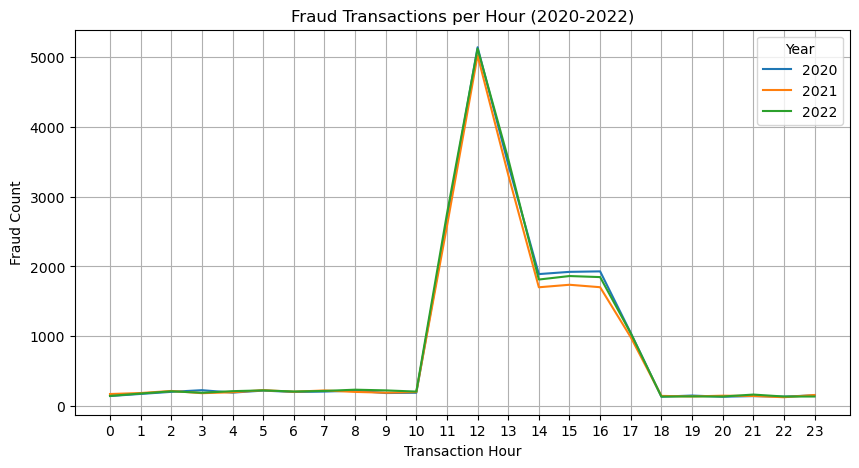

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=df_fraud_counts_pd, x='trans_hour', y='fraud_count', hue='trans_year', palette='tab10')
plt.title('Fraud Transactions per Hour (2020-2022)')
plt.xlabel('Transaction Hour')
plt.ylabel('Fraud Count')
plt.xticks(range(0, 24))  
plt.grid(True)
plt.legend(title='Year')
plt.show()

We can observe across all the three years, fraudulent transactions gradually increase from 10am, peaking at midday. This suggests most fradulent transactions are taking advantage of people during business hours. This is further supported by a gradual decrease in fraud activities in the afternoon until night where most people are not active. Furthermore, the similar patterns across the years indicate there has not been a significant change in the timing of fraudulent activities. 

### Part 3 RDDs vs DataFrame vs Spark SQL (25%) <a class="anchor" name="part-3"></a>
Implement the following queries using RDDs, DataFrame in SparkSQL separately. Log the  time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference between these 3 approaches.

#### Query: <strong>We consider city with population < 50K as small(denoted as S); 50K-200K as medium(M), >200K as large(L). For each city type, using customer age bucket of 10(e.g. 0-9, 10-19, 20-29…), show the percentage ratio of fraudulent transactions in each age bucket.</strong>

#### 3.1. RDD Implementation

In [67]:
%%time
def city_population_rdd(row):
    population = int(row[6])
    if population < 50000:
        city_size = 'S'
    elif population <= 200000:
        city_size = 'M'
    elif population > 200000:
        city_size = 'L'
    else:
        None
    return row + [city_size]

geolocation_rdd2 = geolocation_rdd.map(city_population_rdd)
geolocation_rdd2.take(3)

CPU times: user 11.6 ms, sys: 2.26 ms, total: 13.9 ms
Wall time: 190 ms


[['Burkeville', 'TX', '75932', '31.0099', '-93.6585', '1', '1437', 'S'],
 ['Fresno', 'TX', '77545', '29.5293', '-95.4626', '2', '19431', 'S'],
 ['Osseo', 'MN', '55311', '45.1243', '-93.4996', '3', '65312', 'M']]

In [68]:
%%time
from datetime import datetime, date
from pyspark.sql.types import IntegerType, StringType

def age_rdd(row):
    dob = row[3]
    dob_date = datetime.strptime(dob, "%Y-%m-%d").date()
    today = date.today()
    age = today.year - dob_date.year - ((today.month, today.day) < (dob_date.month, dob_date.day))
    return row + [age]

customers_rdd_new2 = customers_rdd_new.map(age_rdd)
customers_rdd_new2.take(3)

CPU times: user 5.97 ms, sys: 4.02 ms, total: 9.99 ms
Wall time: 142 ms


[['263-99-6044',
  'F',
  'Risk manager',
  '2005-05-30',
  '376443331852',
  '6339',
  19],
 ['292-61-7844',
  'M',
  'Trading standards officer',
  '2003-04-19',
  '870143739098',
  '6200',
  21],
 ['491-28-3311', 'F', 'Optometrist', '2002-04-17', '965855026307', '3547', 22]]

In [35]:
%%time
def age_bucket_rdd(row):
    age = int(row[6])
    if age < 10:
        age_bucket = '0-9'
    elif 10 <= age < 20:
        age_bucket = '10-19'
    elif 20 <= age < 30:
        age_bucket = '20-29'
    elif 30 <= age < 40:
        age_bucket = '30-39'
    elif 40 <= age < 50:
        age_bucket = '40-49'
    elif 50 <= age < 60:
        age_bucket = '50-59'
    elif 60 <= age < 70:
        age_bucket = '60-69'
    elif 70 <= age < 80:
        age_bucket = '70-79'
    elif 80 <= age < 90:
        age_bucket = '80-89'
    elif age >= 90:
        age_bucket = '90+'
    else:
        age_bucket = None  
    return row + [age_bucket]

customers_rdd_new3 = customers_rdd_new2.map(age_bucket_rdd)
# customers_rdd_new3.take(11)

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 17.9 µs


In [36]:
customers_geoid = customers_rdd_new3.map(lambda row: (row[5], row)) 
geolocation_geoid = geolocation_rdd2.map(lambda row: (row[5], row))
customer_geo_rdd = customers_geoid.join(geolocation_geoid).map(lambda x: x[1][0] + x[1][1])
# customer_geo_rdd.take(50)

In [37]:
transactions_custid_rdd = transactions_rdd.map(lambda row: (row[4], row))
customer_geo_custid_rdd = customer_geo_rdd.map(lambda row: (row[0],row))
customer_geo_custid_rdd = transactions_custid_rdd.join(customer_geo_custid_rdd) \
                            .map(lambda row: row[1][0] + row[1][1])
# customer_geo_custid_rdd.take(10)

In [38]:
%%time

total_transactions_rdd = customer_geo_custid_rdd.map(lambda row: ((row[15], row[23]), 1)) \
                            .reduceByKey(lambda x, y: x + y)
# total_transactions_rdd.take(20)

fraud_transactions_rdd = customer_geo_custid_rdd.filter(lambda row: row[3] == '1') \
                            .map(lambda row:  ((row[15], row[23]), 1)) \
                            .reduceByKey(lambda x, y: x + y)
# fraud_transactions_rdd = fraud_transactions_agg.collect()
#fraud_transactions_rdd.take(20)
fraud_ratio_rdd = total_transactions_rdd.join(fraud_transactions_rdd)

CPU times: user 7.38 ms, sys: 2.26 ms, total: 9.64 ms
Wall time: 22.1 ms


In [39]:
%%time

fraud_ratio_rdd = total_transactions_rdd.join(fraud_transactions_rdd) \
                    .map(lambda row: [row[0][0], row[0][1], row[1][0], row[1][1]])
# fraud_ratio_rdd.take(20)

CPU times: user 2.25 ms, sys: 1.96 ms, total: 4.2 ms
Wall time: 6.54 ms


In [61]:
%%time
def calculate_fraud_ratio_rdd(row):
    total_transactions = row[2]
    fraudulent_transactions =  row[3]
    fraud_perc_ratio = (fraudulent_transactions / total_transactions) * 100
    return row + [fraud_perc_ratio]

fraud_ratio_rdd2 = fraud_ratio_rdd.map(calculate_fraud_ratio_rdd).sortBy(lambda x: x[4], ascending=False).collect()
fraud_ratio_rdd2

CPU times: user 38 ms, sys: 12.8 ms, total: 50.7 ms
Wall time: 7.62 s


[['80-89', 'L', 186354, 922, 0.4947572898891357],
 ['90+', 'S', 229163, 994, 0.4337523945837679],
 ['90+', 'L', 148187, 642, 0.4332363837583593],
 ['60-69', 'S', 1020474, 4410, 0.432152117545376],
 ['60-69', 'M', 614754, 2640, 0.429440068710411],
 ['50-59', 'L', 883346, 3783, 0.42825800988514123],
 ['70-79', 'M', 384503, 1638, 0.4260044785086202],
 ['60-69', 'L', 648874, 2760, 0.425352225547641],
 ['70-79', 'L', 340208, 1442, 0.42385834548276347],
 ['70-79', 'S', 598931, 2504, 0.41807820934297946],
 ['50-59', 'M', 799418, 3268, 0.40879740010857896],
 ['90+', 'M', 121939, 495, 0.40594067525566063],
 ['50-59', 'S', 1558093, 6163, 0.39554763419128386],
 ['80-89', 'S', 385514, 1499, 0.38883153400395315],
 ['80-89', 'M', 273786, 884, 0.322879913509091],
 ['30-39', 'S', 2527715, 5087, 0.20124895409490393],
 ['20-29', 'S', 1290081, 2584, 0.20029750069956845],
 ['40-49', 'M', 1600044, 3101, 0.19380717030281666],
 ['30-39', 'L', 1560881, 2988, 0.1914303524740195],
 ['40-49', 'L', 1780884, 3359,

#### 3.2. DataFrame Implementation

In [66]:
%%time
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def city_population_df(population):
    population = int(population)
    if population < 50000:
        city_size = 'S'
    elif population <= 200000:
        city_size = 'M'
    elif population > 200000:
        city_size = 'L'
    else:
        None
    return city_size

city_population_udf = udf(city_population_df, StringType())
df_geolocation2 = df_geolocation.withColumn('city_size', city_population_udf('population'))
df_geolocation2.show(3)

+----------+-----+-----+-------+--------+--------------+----------+---------+
|      city|state|  zip|    lat|    long|id_geolocation|population|city_size|
+----------+-----+-----+-------+--------+--------------+----------+---------+
|Burkeville|   TX|75932|31.0099|-93.6585|             1|      1437|        S|
|    Fresno|   TX|77545|29.5293|-95.4626|             2|     19431|        S|
|     Osseo|   MN|55311|45.1243|-93.4996|             3|     65312|        M|
+----------+-----+-----+-------+--------+--------------+----------+---------+
only showing top 3 rows

CPU times: user 9.05 ms, sys: 2.98 ms, total: 12 ms
Wall time: 195 ms


In [43]:
%%time
from datetime import datetime, date
from pyspark.sql.types import IntegerType, StringType

def age(dob):
    dob_date = datetime.strptime(dob, "%Y-%m-%d").date()
    today = date.today()
    return today.year - dob_date.year - ((today.month, today.day) < (dob_date.month, dob_date.day))

age_udf = udf(age, IntegerType())
# df_customers.select('dob',age_udf('dob').alias("age")).show(5)
df_customers2 = df_customers.withColumn('age', age_udf('dob'))
df_customers2.select('id_customer', 'address', 'dob', 'id_geolocation', 'age').show(5, truncate= False)

+-----------+---------------------------+----------+--------------+---+
|id_customer|address                    |dob       |id_geolocation|age|
+-----------+---------------------------+----------+--------------+---+
|263-99-6044|058 Stanley Cliff          |2005-05-30|6339          |19 |
|292-61-7844|413 Angela Mall            |2003-04-19|6200          |21 |
|491-28-3311|5712 Tamara Estate         |2002-04-17|3547          |22 |
|826-23-1754|1016 Bennett Mountains     |2001-07-15|6302          |23 |
|172-11-9264|819 Joseph Plains Suite 807|2003-11-21|5227          |20 |
+-----------+---------------------------+----------+--------------+---+
only showing top 5 rows

CPU times: user 6.85 ms, sys: 1.84 ms, total: 8.69 ms
Wall time: 156 ms


In [44]:
%%time
def age_bucket_df(age):
    age = int(age)
    if age < 10:
        age_bucket = '0-9'
    elif 10 <= age < 20:
        age_bucket = '10-19'
    elif 20 <= age < 30:
        age_bucket = '20-29'
    elif 30 <= age < 40:
        age_bucket = '30-39'
    elif 40 <= age < 50:
        age_bucket = '40-49'
    elif 50 <= age < 60:
        age_bucket = '50-59'
    elif 60 <= age < 70:
        age_bucket = '60-69'
    elif 70 <= age < 80:
        age_bucket = '70-79'
    elif 80 <= age < 90:
        age_bucket = '80-89'
    elif age >= 90:
        age_bucket = '90+'
    else:
        age_bucket = None  
    return age_bucket

age_bucket_udf = udf(age_bucket_df, StringType())
df_customers3 = df_customers2.withColumn('age_bucket', age_bucket_udf('age'))
# df_customers3.show(5, truncate=False)

CPU times: user 3.9 ms, sys: 0 ns, total: 3.9 ms
Wall time: 9.51 ms


Join geolocation and customer together, and then join with transaction on customer id. 

In [45]:
%%time
df_customers_geo = df_customers3.join(df_geolocation2, on='id_geolocation', how='left')
# df_customers_geo.select('id_geolocation', 'id_customer', 'age_bucket', 'city_size').show(10,truncate=False)
df_transactions_age = df_transactions.join(df_customers_geo, on='id_customer', how='left')
df_transactions_age.select('id_customer', 'age_bucket', 
                        'city_size', 'id_transaction','is_fraud').show(5,truncate=False)


+-----------+----------+---------+--------------------------------+--------+
|id_customer|age_bucket|city_size|id_transaction                  |is_fraud|
+-----------+----------+---------+--------------------------------+--------+
|037-51-6398|50-59     |S        |d209a21733dbb5343402e40a5b185ba9|0       |
|124-79-3406|20-29     |L        |c38fe9a2ce0225610b42d211ff98731e|0       |
|160-40-2465|60-69     |S        |26214be045a22c418c0bb18776be3bad|0       |
|160-40-2465|60-69     |S        |19874f165d861dec14f4551d3ede0eb7|0       |
|177-53-4118|30-39     |S        |724fb22cd87a92defc06e691c8febd54|0       |
+-----------+----------+---------+--------------------------------+--------+
only showing top 5 rows

CPU times: user 3.33 ms, sys: 1.86 ms, total: 5.18 ms
Wall time: 562 ms


In [46]:
%%time
df_total_transactions = df_transactions_age.groupBy('age_bucket', 'city_size').agg(
    F.count('id_transaction').alias('total_transactions'))

df_fraud_transactions = df_transactions_age.filter(F.col('is_fraud') == 1).groupBy('age_bucket', 'city_size').agg(
    F.count('*').alias('fraudulent_transactions'))

df_total_transactions.show()
# df_fraud_transactions.show()

+----------+---------+------------------+
|age_bucket|city_size|total_transactions|
+----------+---------+------------------+
|     80-89|        S|            385514|
|     50-59|        S|           1558093|
|     50-59|        L|            883346|
|     40-49|        S|           2863639|
|     30-39|        L|           1560881|
|     70-79|        M|            384503|
|     30-39|        M|           1602549|
|     40-49|        L|           1780884|
|       90+|        L|            148187|
|     70-79|        S|            598931|
|       90+|        M|            121939|
|     20-29|        S|           1290081|
|     70-79|        L|            340208|
|     40-49|        M|           1600044|
|     50-59|        M|            799418|
|     20-29|        L|            785073|
|     60-69|        S|           1020474|
|     30-39|        S|           2527715|
|     80-89|        L|            186354|
|     60-69|        L|            648874|
+----------+---------+------------

In [47]:
df_fraud_ratio = df_total_transactions.join(df_fraud_transactions,on=['age_bucket', 'city_size'],how='left')
df_fraud_ratio.show()

+----------+---------+------------------+-----------------------+
|age_bucket|city_size|total_transactions|fraudulent_transactions|
+----------+---------+------------------+-----------------------+
|     80-89|        S|            385514|                   1499|
|     50-59|        S|           1558093|                   6163|
|     50-59|        L|            883346|                   3783|
|     40-49|        S|           2863639|                   5363|
|     30-39|        L|           1560881|                   2988|
|     70-79|        M|            384503|                   1638|
|     30-39|        M|           1602549|                   2911|
|     40-49|        L|           1780884|                   3359|
|       90+|        L|            148187|                    642|
|     70-79|        S|            598931|                   2504|
|       90+|        M|            121939|                    495|
|     20-29|        S|           1290081|                   2584|
|     70-7

Created udf that calcaults fraud ratio percentage and applied to the joined dataframes. Sorted output by highest fraud percentage ratio.

In [48]:
%%time
from pyspark.sql.types import DoubleType

def fraud_ratio(total_transactions, fraudulent_transactions):
    total_transactions = int(total_transactions)
    fraudulent_transactions = int(fraudulent_transactions)
    fraud_perc_ratio = (fraudulent_transactions / total_transactions) * 100
    return fraud_perc_ratio

fraud_ratio_udf = udf(fraud_ratio, DoubleType())
df_fraud_ratio2 = df_fraud_ratio.withColumn('fraud_perc_ratio', fraud_ratio_udf('total_transactions', 'fraudulent_transactions'))
df_fraud_ratio2.orderBy(F.col('fraud_perc_ratio').desc()).show(25,truncate= False)

+----------+---------+------------------+-----------------------+-------------------+
|age_bucket|city_size|total_transactions|fraudulent_transactions|fraud_perc_ratio   |
+----------+---------+------------------+-----------------------+-------------------+
|80-89     |L        |186354            |922                    |0.4947572898891357 |
|90+       |S        |229163            |994                    |0.4337523945837679 |
|90+       |L        |148187            |642                    |0.4332363837583593 |
|60-69     |S        |1020474           |4410                   |0.432152117545376  |
|60-69     |M        |614754            |2640                   |0.429440068710411  |
|50-59     |L        |883346            |3783                   |0.42825800988514123|
|70-79     |M        |384503            |1638                   |0.4260044785086202 |
|60-69     |L        |648874            |2760                   |0.425352225547641  |
|70-79     |L        |340208            |1442         

#### 3.3. Spark SQL Implementation

In [49]:
%%time
spark.udf.register('city_population_df', city_population_df, StringType())
geolocation_sql = spark.sql('''
    SELECT *,
           city_population_df(population) AS city_size
    FROM sql_geolocation
''')
geolocation_sql.show()
geolocation_sql.createOrReplaceTempView("geolocation_sql")

+----------------+-----+-----+-------+---------+--------------+----------+---------+
|            city|state|  zip|    lat|     long|id_geolocation|population|city_size|
+----------------+-----+-----+-------+---------+--------------+----------+---------+
|      Burkeville|   TX|75932|31.0099| -93.6585|             1|      1437|        S|
|          Fresno|   TX|77545|29.5293| -95.4626|             2|     19431|        S|
|           Osseo|   MN|55311|45.1243| -93.4996|             3|     65312|        M|
|          Pomona|   CA|91766|34.0418|-117.7569|             4|    154204|        M|
|       Vacaville|   CA|95688|38.3847|-121.9887|             5|     99475|        M|
|South Lake Tahoe|   CA|96150| 38.917|-119.9865|             6|     29800|        S|
|       Belvidere|   TN|37306|35.1415| -86.1728|             7|      2760|        S|
|        Columbia|   SC|29205|33.9903| -80.9997|             8|    333497|        L|
|         Chicago|   IL|60660|41.9909| -87.6629|             9|  

In [50]:
%%time
spark.udf.register('age', age, IntegerType())
customers_sql = spark.sql('''
    SELECT id_customer, 
           address, 
           dob, 
           id_geolocation, 
           age(dob) AS age
    FROM sql_customers
''')
customers_sql.show(truncate=False)

+-----------+----------------------------+----------+--------------+---+
|id_customer|address                     |dob       |id_geolocation|age|
+-----------+----------------------------+----------+--------------+---+
|263-99-6044|058 Stanley Cliff           |2005-05-30|6339          |19 |
|292-61-7844|413 Angela Mall             |2003-04-19|6200          |21 |
|491-28-3311|5712 Tamara Estate          |2002-04-17|3547          |22 |
|826-23-1754|1016 Bennett Mountains      |2001-07-15|6302          |23 |
|172-11-9264|819 Joseph Plains Suite 807 |2003-11-21|5227          |20 |
|150-95-7922|51844 Nicholas Lane         |2006-03-06|4047          |18 |
|841-99-2980|91279 Natalie Place Apt. 172|2005-07-01|6271          |19 |
|705-41-6699|58874 Lane Trail Suite 213  |2003-01-23|6302          |21 |
|016-22-4524|52812 Hall Point            |2001-08-26|5614          |23 |
|639-46-2126|0558 Alex Flats Suite 414   |2005-02-10|6328          |19 |
|088-02-7683|48964 Lambert Curve         |2001-11-1

In [51]:
%%time
spark.udf.register('age_bucket_df', age_bucket_df, StringType())
customers_sql.createOrReplaceTempView("customers_sql")
customers_sql2 = spark.sql('''
    SELECT *, 
           age_bucket_df(age) AS age_bucket
    FROM customers_sql
''')
customers_sql2.show(truncate=False)
customers_sql2.createOrReplaceTempView("customers_sql2")

+-----------+----------------------------+----------+--------------+---+----------+
|id_customer|address                     |dob       |id_geolocation|age|age_bucket|
+-----------+----------------------------+----------+--------------+---+----------+
|263-99-6044|058 Stanley Cliff           |2005-05-30|6339          |19 |10-19     |
|292-61-7844|413 Angela Mall             |2003-04-19|6200          |21 |20-29     |
|491-28-3311|5712 Tamara Estate          |2002-04-17|3547          |22 |20-29     |
|826-23-1754|1016 Bennett Mountains      |2001-07-15|6302          |23 |20-29     |
|172-11-9264|819 Joseph Plains Suite 807 |2003-11-21|5227          |20 |20-29     |
|150-95-7922|51844 Nicholas Lane         |2006-03-06|4047          |18 |10-19     |
|841-99-2980|91279 Natalie Place Apt. 172|2005-07-01|6271          |19 |10-19     |
|705-41-6699|58874 Lane Trail Suite 213  |2003-01-23|6302          |21 |20-29     |
|016-22-4524|52812 Hall Point            |2001-08-26|5614          |23 |20-2

In [52]:
%%time
customers_geo_sql = spark.sql('''
    SELECT g.id_geolocation,
           g.city_size,
           c.id_customer,
           c.age_bucket
    FROM customers_sql2 c LEFT JOIN geolocation_sql g
    ON c.id_geolocation = g.id_geolocation
''')
customers_geo_sql.show()
customers_geo_sql.createOrReplaceTempView("customers_geo_sql")

+--------------+---------+-----------+----------+
|id_geolocation|city_size|id_customer|age_bucket|
+--------------+---------+-----------+----------+
|          6339|        S|263-99-6044|     10-19|
|          6200|        S|292-61-7844|     20-29|
|          3547|        S|491-28-3311|     20-29|
|          6302|        L|826-23-1754|     20-29|
|          5227|        M|172-11-9264|     20-29|
|          4047|        L|150-95-7922|     10-19|
|          6271|        M|841-99-2980|     10-19|
|          6302|        L|705-41-6699|     20-29|
|          5614|        L|016-22-4524|     20-29|
|          6328|        S|639-46-2126|     10-19|
|          6328|        S|088-02-7683|     20-29|
|          6082|        S|738-76-3908|     80-89|
|          5835|        L|508-68-8597|     10-19|
|          5476|        M|122-78-6695|     20-29|
|          3308|        M|582-05-2280|     20-29|
|          5561|        S|828-04-3697|     20-29|
|          6302|        L|045-31-2588|     20-29|


In [53]:
%%time
transaction_age_sql = spark.sql('''
    SELECT t.id_customer,
           t.is_fraud,
           t.id_geolocation,
           c.city_size,
           c.age_bucket
    FROM sql_transactions t LEFT JOIN customers_geo_sql c
    ON t.id_customer = c.id_customer    
''')
transaction_age_sql.show()
transaction_age_sql.createOrReplaceTempView("transaction_age_sql")

+-----------+--------+--------------+---------+----------+
|id_customer|is_fraud|id_geolocation|city_size|age_bucket|
+-----------+--------+--------------+---------+----------+
|120-21-3601|       0|          1108|        L|     40-49|
|277-12-7638|       0|           337|        S|     50-59|
|823-85-5801|       0|           950|        M|     20-29|
|751-22-8893|       0|          2799|        S|     40-49|
|687-93-6553|       0|          2576|        M|     80-89|
|892-62-7211|       0|          2352|        S|     30-39|
|397-54-0253|       0|           218|        S|     20-29|
|385-77-6544|       0|            87|        M|     50-59|
|615-63-3623|       0|           718|        S|     50-59|
|296-96-6479|       0|          1090|        L|     60-69|
|031-66-3742|       0|          2148|        L|     40-49|
|248-09-7729|       0|           222|        M|     60-69|
|794-45-4364|       0|            46|        S|     30-39|
|436-80-2340|       0|            60|        M|     20-2

In [54]:
%%time
total_transactions_sql = spark.sql('''
    SELECT age_bucket,
           city_size,
           COUNT(*) AS total_transactions
    FROM transaction_age_sql
    GROUP BY age_bucket, city_size
''')

fraud_transactions_sql = spark.sql('''
    SELECT age_bucket,
           city_size,
           COUNT(*) AS fraudulent_transactions
    FROM transaction_age_sql
    WHERE is_fraud = 1
    GROUP BY age_bucket, city_size
''')

total_transactions_sql.show()
total_transactions_sql.createOrReplaceTempView("total_transactions_sql")

+----------+---------+------------------+
|age_bucket|city_size|total_transactions|
+----------+---------+------------------+
|     80-89|        S|            385514|
|     50-59|        S|           1558093|
|     50-59|        L|            883346|
|     40-49|        S|           2863639|
|     30-39|        L|           1560881|
|     70-79|        M|            384503|
|     30-39|        M|           1602549|
|     40-49|        L|           1780884|
|       90+|        L|            148187|
|     70-79|        S|            598931|
|       90+|        M|            121939|
|     20-29|        S|           1290081|
|     70-79|        L|            340208|
|     40-49|        M|           1600044|
|     50-59|        M|            799418|
|     20-29|        L|            785073|
|     60-69|        S|           1020474|
|     30-39|        S|           2527715|
|     80-89|        L|            186354|
|     60-69|        L|            648874|
+----------+---------+------------

In [55]:
fraud_transactions_sql.show()
fraud_transactions_sql.createOrReplaceTempView("fraud_transactions_sql")

+----------+---------+-----------------------+
|age_bucket|city_size|fraudulent_transactions|
+----------+---------+-----------------------+
|     80-89|        S|                   1499|
|     50-59|        S|                   6163|
|     50-59|        L|                   3783|
|     40-49|        S|                   5363|
|     30-39|        L|                   2988|
|     70-79|        M|                   1638|
|     30-39|        M|                   2911|
|     40-49|        L|                   3359|
|       90+|        L|                    642|
|     70-79|        S|                   2504|
|       90+|        M|                    495|
|     20-29|        S|                   2584|
|     70-79|        L|                   1442|
|     40-49|        M|                   3101|
|     50-59|        M|                   3268|
|     20-29|        L|                   1471|
|     60-69|        S|                   4410|
|     30-39|        S|                   5087|
|     80-89| 

In [63]:
%%time
df_fraud_analysis_sql = spark.sql('''
    SELECT t.age_bucket,
           t.city_size,
           t.total_transactions,
           f.fraudulent_transactions,
           (f.fraudulent_transactions / t.total_transactions) * 100 AS fraud_perc_ratio
    FROM total_transactions_sql t
    LEFT JOIN fraud_transactions_sql f
    ON t.age_bucket = f.age_bucket AND t.city_size = f.city_size
    ORDER BY fraud_perc_ratio DESC
''')

df_fraud_analysis_sql.show(25)

+----------+---------+------------------+-----------------------+-------------------+
|age_bucket|city_size|total_transactions|fraudulent_transactions|   fraud_perc_ratio|
+----------+---------+------------------+-----------------------+-------------------+
|     80-89|        L|            186354|                    922| 0.4947572898891357|
|       90+|        S|            229163|                    994| 0.4337523945837679|
|       90+|        L|            148187|                    642| 0.4332363837583593|
|     60-69|        S|           1020474|                   4410|  0.432152117545376|
|     60-69|        M|            614754|                   2640|  0.429440068710411|
|     50-59|        L|            883346|                   3783|0.42825800988514123|
|     70-79|        M|            384503|                   1638| 0.4260044785086202|
|     60-69|        L|            648874|                   2760|  0.425352225547641|
|     70-79|        L|            340208|             

### 3.4 Which one is the easiest to implement in your opinion? Log the time taken for each query, and observe the query execution time, among RDD, DataFrame, SparkSQL, which is the fastest and why? Please include proper reference. (Maximum 500 words.)

For me, SQL implementation was the easier as the sql operations adn functions are pretty straightforward, especially when joining and filtering conditions. Dataframe would be the second easiest to implement having worked with pandas previously. RDD operations were the hardest to come up with as it only takes in lambda and indixes when trying to access data, especially having removed headers.  Moreover, RDD outputs can be very hard to read at times when it beomes tupe and lists, hence majority of the rdd were flatten out.

In therms of execution time, below 
* CPU times: user 38 ms, sys: 12.8 ms, total: 50.7 ms
* Wall time: 7.62 s

Compared with Dataframe:

* CPU times: user 34.1 ms, sys: 8.91 ms, total: 43 ms
* Wall time: 16 s

Spark SQL

* CPU times: user 11.7 ms, sys: 3.14 ms, total: 14.8 ms
* Wall time: 14.5 s


### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html